### Notebook index

[3 Minimal examples](03-minimal.ipynb)  
[4 Plotting chromosomes](04-plotting.ipynb)   
[5 Multiple OTUs](05-multiple.ipynb)    
[6 Changing units](06-units.ipynb)  
[7 GISH](07-gish.ipynb)  
[8 Groups](08-groups.ipynb)  
[9 Circular Plots](09-circular.ipynb)  
[10 Plotting alongside phylogeny](10-phylogeny.ipynb)  
[11 Citrus](11-citrushelp.ipynb)  
[12 Human Karyotype](12-human.ipynb)  

# Plotting chromosomes

This guide shows how to plot idiograms of measured karyotypes and optionally marks.

In [8]:
# General jupyter instructions

In [9]:
# press Ctrl + Enter to RUN active cell

# SHOW keyboard shortcuts Ctrl + M then H (only jupyter notebooks and colab)

# Ctrl + D (or X) DELETE a line of code

# press Ctrl + M to escape from cell (opposite to ENTER)

# then !
# B to ADD cell below or A above
# M to turn code cell into MARKDOWN
# Y turn markdown to CODE
# O to toggle OUTPUT
# D D to DELETE cell

# If in jupyter-lab:
# collapse cell clicking in the blue left bar
# use the settings menu to use the dark theme

# if in colab:
# remove bar at 80 in tools, preferences, 80 -> 0

In [10]:
# install if necessary

if (system.file(package = "idiogramFISH") == '') {
  install.packages("idiogramFISH")
}

library(idiogramFISH)

## Plot monocentrics

Initially you have to put chromosome data in data.frames.

Main three data.frames: 

* One for chr. sizes (parameter `dfChrSize`)
* One for marks' positions  (parameter `dfMarkPos`)
* One (optional) for mark style (parameter `dfMarkColor`)

For a way to start with only one data.frame of chr. size and marks' pos., see Chapter 8.

### data.frame of chr. size

In [41]:
# Example data.frame to write in R, use: (column OTU is optional if only 1 OTU)
mydfChrSize<-read.table(text=
"            OTU chrName shortArmSize longArmSize 
  \"Species one\"   1     1.5         2.0  
  \"Species one\"   2     2.0         2.5  
  \"Species one\"   3     1.0         1.5
  \"Species one\"   B     2.0         3.5"  ,  header=TRUE, stringsAsFactors=FALSE,fill=TRUE)
mydfChrSize

OTU,chrName,shortArmSize,longArmSize
<chr>,<chr>,<dbl>,<dbl>
Species one,1,1.5,2.0
Species one,2,2.0,2.5
Species one,3,1.0,1.5
Species one,B,2.0,3.5


### Loading saved data

If you use RStudio, in the menu "Session", use "Set working directory" for choosing your desired folder or:

If you use colab (google) use the menu to the left to upload files to the virtual machine


`
setwd("~/folder/subfolder")
`

Open your chromosome data data.frame importing it from a .csv (read.csv) or .xls file (readxl). 

`mydfChrSize<-read.csv("somefile.csv")`


Editing a data.frame:

`bigdfOfChrSize <- edit(bigdfOfChrSize, edit.row.names = FALSE)`

For fixing column names use:

In [12]:
colnames(mydfChrSize)<-c("OTU", "chrName","shortArmSize","longArmSize")

### Marks' position data

Open or write your mark positions in a data.frame. This data.frame has the marks present in all karyotypes with position info.
This data.frame has also the centromeric marks present in all karyotypes.

Column `chrRegion` defines the arm or region of occurrence (`p`, `q`, `w`, `cen`). Distance to centromere is defined in `markDistCen`.


In [42]:
# We will use column OTU if data.frame because chromosome size df has it
mydfOfMarks<-read.table(text=
"            OTU chrName markName chrRegion markSize markDistCen
\"Species one\"      1      45S       p       NA         NA     # no measure (NA) means whole arm
\"Species one\"      1       5S       q      0.5         0.5
\"Species one\"      B  \"B mark\"    w       NA         NA     # w for whole chromosome
\"Species one\"      B  \"cB mark\"   q       NA         1.0    
\"Species one\"      2    cgene4      p        1         1.0
\"Species one\"      2    cgene1      q        1         1
\"Species one\"      2    cgene2      q      0.5         2.0
\"Species one\"      3     DAPI       q       NA         1
\"Species one\"      3    cgene3      p       NA         0.5 
\"Species one\"      1     DAPI       cen
\"Species one\"      3      CMA       cen", header=TRUE, stringsAsFactors=FALSE,fill=TRUE)
mydfOfMarks

OTU,chrName,markName,chrRegion,markSize,markDistCen
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Species one,1,45S,p,NA,NA
Species one,1,5S,q,0.5,0.5
Species one,B,B mark,w,NA,NA
Species one,B,cB mark,q,NA,1.0
Species one,2,cgene4,p,1.0,1.0
Species one,2,cgene1,q,1.0,1.0
Species one,2,cgene2,q,0.5,2.0
Species one,3,DAPI,q,NA,1.0
Species one,3,cgene3,p,NA,0.5


For fixing column names use something like:

In [14]:
if(F){
colnames(mydfMarkColor)<-c("OTU", "chrName","markName","chrRegion","markSize","markDistCen") 
}

### Marks' general data 

This data.frame is optional. It has the marks present in all karyotypes without position info.

It includes color and style. If the `style` column is not present, param. `defaultStyleMark = "square"` will be used during plotting.

Note the `cenStyle` to make constrictions, mimicking centromeres.



In [43]:
# From scratch:
mydfMarkColor<-read.table(text=
" markName      markColor      style
        5S      red            dots
       45S      chartreuse3    square
    cgene1      chocolate      upArrow
    cgene2      salmon         downArrow
    cgene3      \"#056522\"    cMLeft    
      DAPI      dodgerblue     cM   
\"cB mark\"     black          cenStyle   
       CMA      darkgoldenrod1 square
\"B mark\"      black          square
    cgene4      cornflowerblue exProtein",  header=TRUE, stringsAsFactors=FALSE,fill=TRUE)
mydfMarkColor

markName,markColor,style
<chr>,<chr>,<chr>
5S,red,dots
45S,chartreuse3,square
cgene1,chocolate,upArrow
cgene2,salmon,downArrow
cgene3,#056522,cMLeft
DAPI,dodgerblue,cM
cB mark,black,cenStyle
CMA,darkgoldenrod1,square
B mark,black,square


For fixing column names use:


In [16]:
colnames(mydfMarkColor)<-c("markName", "markColor","style") 
# if style column is not present it will be filled with "square"

In [17]:
### Add some text to the right

In [18]:
# We will use column note to add a note to the right of the karyotype of the 
# OTU in column OTU
notesdf<-read.table(text=
"            OTU    note
\"Species one\"   \"Author notes\"  ", header=TRUE, stringsAsFactors=FALSE,fill=TRUE)
notesdf

OTU,note
<chr>,<chr>
Species one,Author notes


For adding just the OTU name (from column `OTU` of data.frame of chr. size) to the right, use `OTUasNote=TRUE`

### Plotting

You can plot without marks (use only 1st data.frame), but we will use all 4 data.frames created.
By default the function will calculate indices [@Zarco1986new;@Watanabe1999] and morphological categories of [Guerra](https://ferroao.gitlab.io/guerra1986/Guerra1986.pdf) [-@Guerra1986d] and Levan [-@Levan1964].
Use parameters `chrIndex` and `morpho` of the function `plotIdiograms` to modify that. See `?plotIdiograms`.

The `cM` style of mark always adds the name as if `legend="inline"`, even when `legend="aside"` (default).


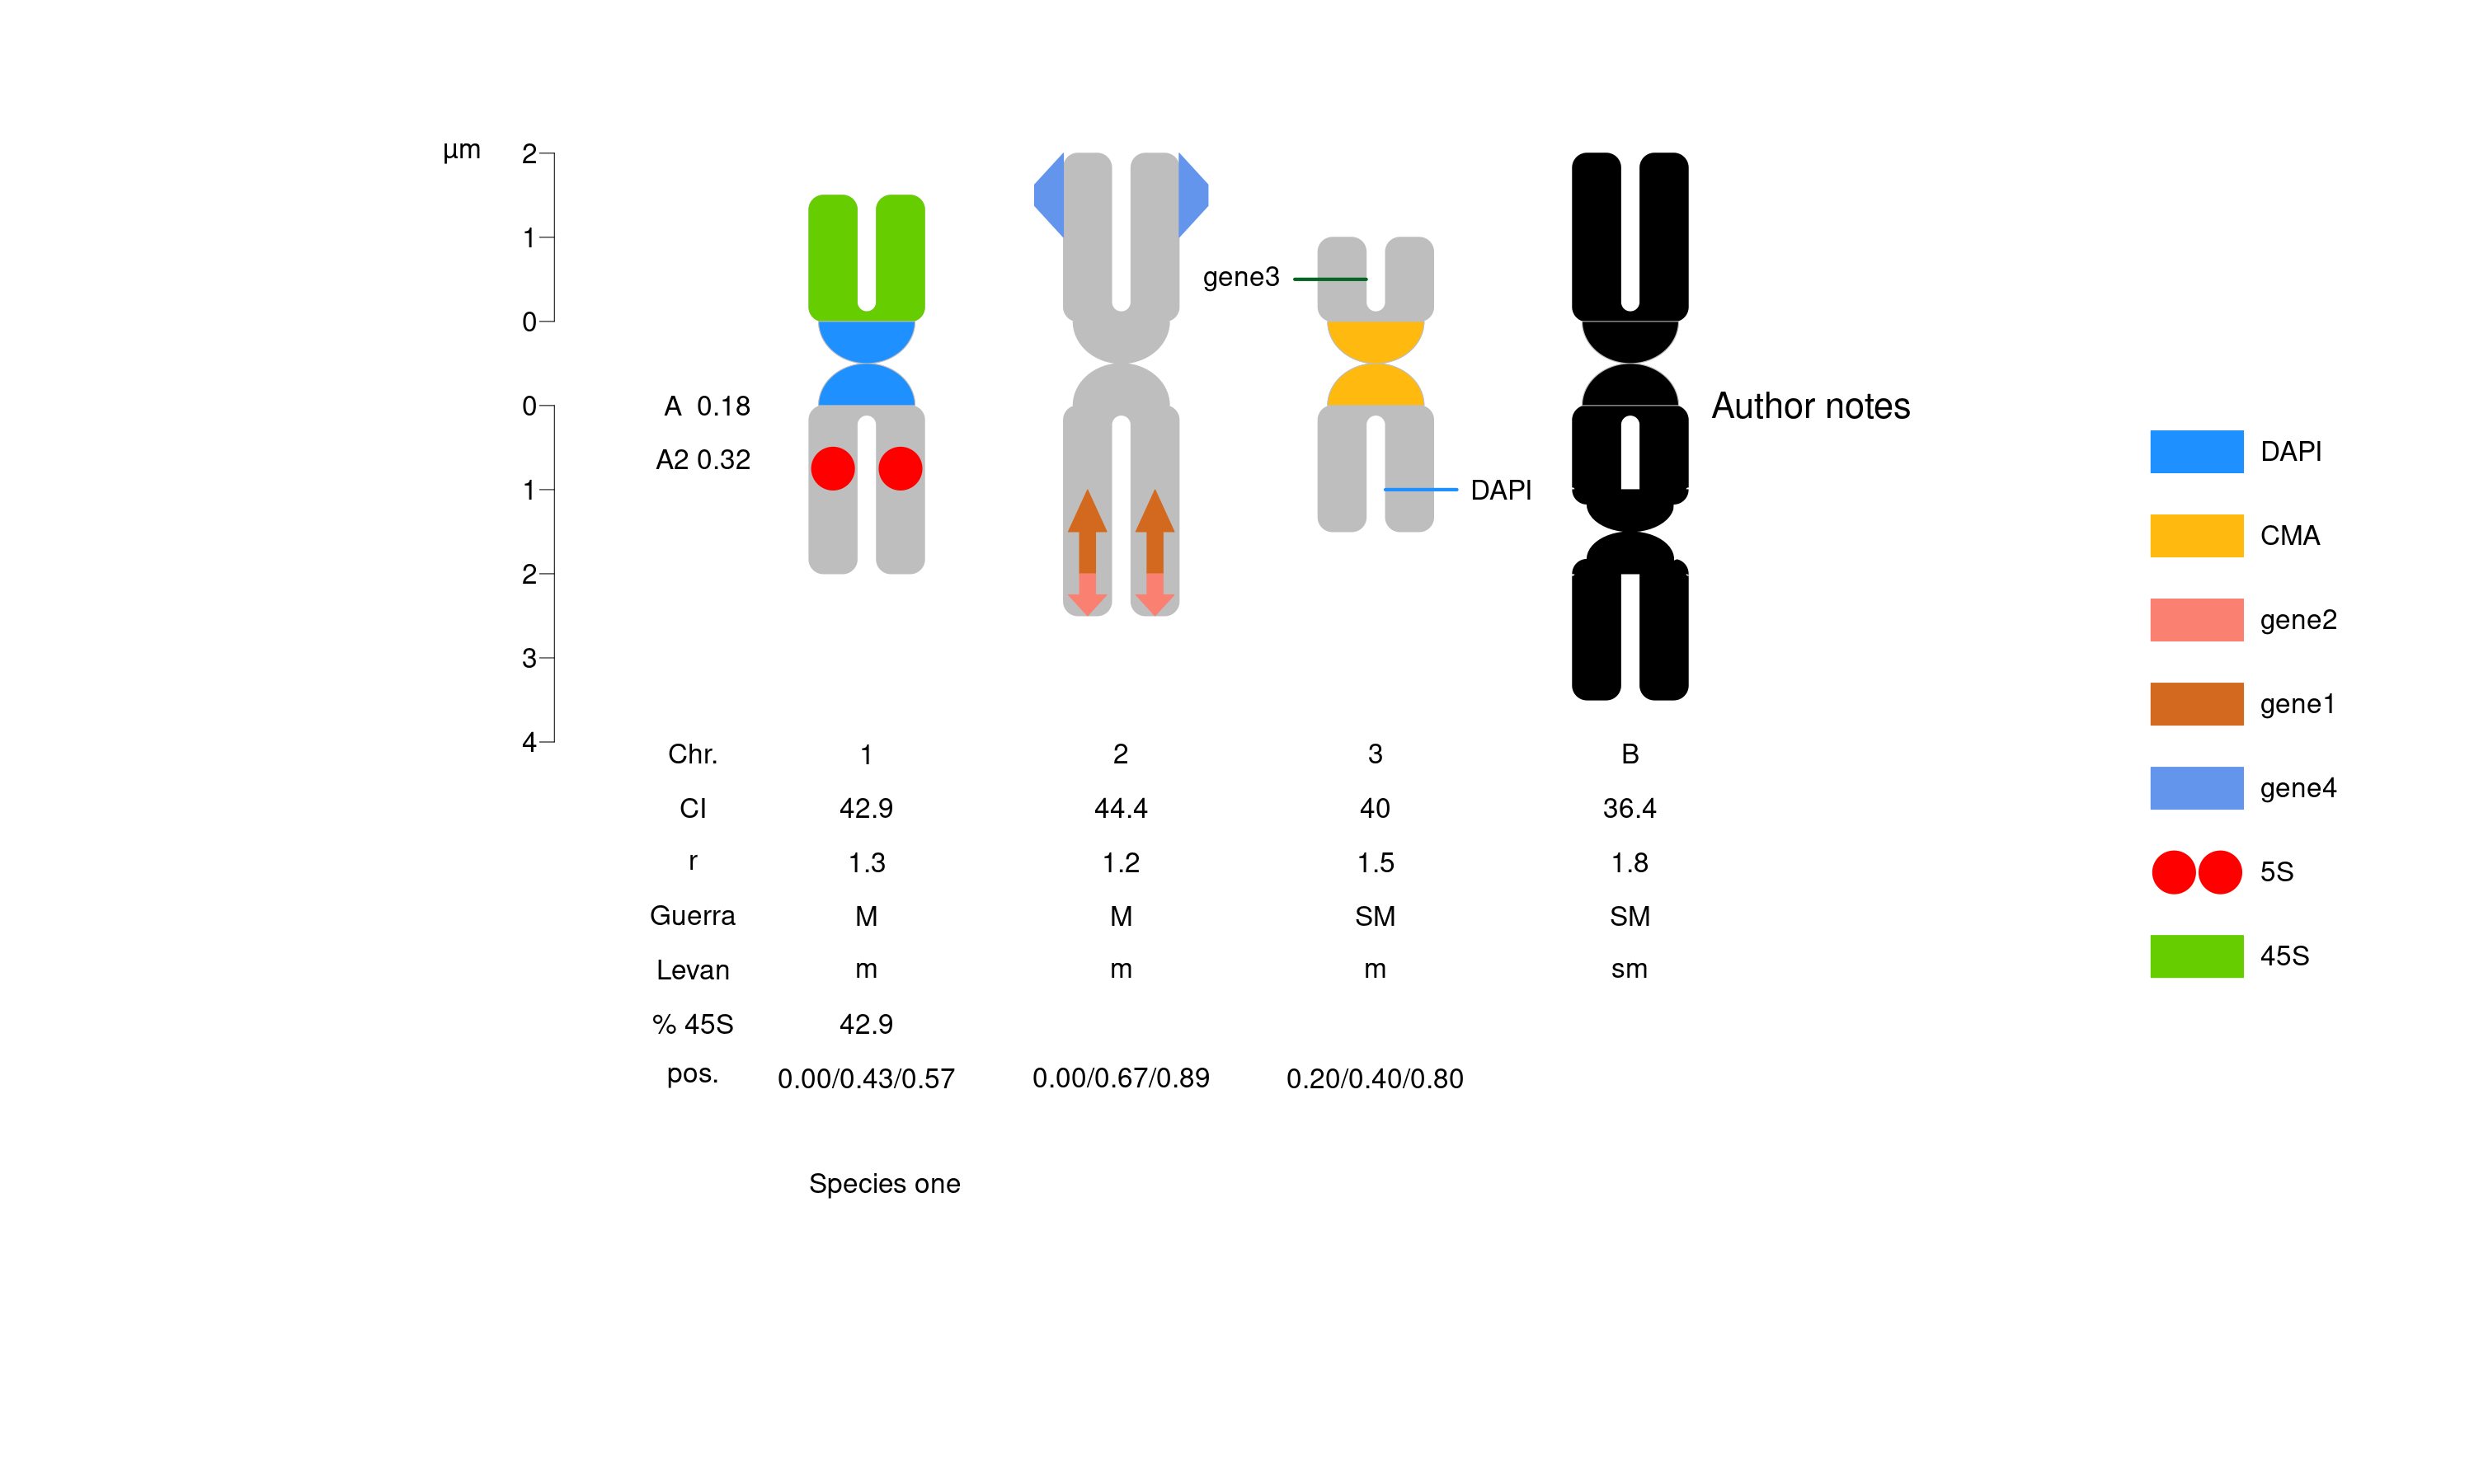

In [44]:
par(mar = c(0, 0, 0, 0))

options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res = 200)

suppressMessages(
plotIdiograms(dfChrSize= mydfChrSize,     # chr. size data.frame
              dfMarkPos= mydfOfMarks,     # mark position data.frame (inc. cen.)
              dfMarkColor=mydfMarkColor,  # mark style d.f.
              
              chrSpacing=.6,              # separ. among chr.
              distTextChr = .7,           # separation among text and chr. names and ind.        
              orderChr = "name",          # order chr. by name
              karHeiSpace=2               # vertical size of karyotype including spacer
              
              ,arrowhead = .5             # proportion of head of arrow
              
              ,fixCenBorder = TRUE        # use chrColor as border color of cen. or cen. marks
              ,legendWidth = .8           # legend item width
              ,legendHeight = .5          # legend item height
              ,markLabelSpacer = 2        # legend spacer
              ,lwd.mimicCen = 2.5         # constric. mark line width
              
              ,rulerPos=0                 # ruler position
              ,ruler.tck=-0.01            # ticks of ruler size and orientation
              ,xPosRulerTitle = 2.5       # ruler units pos.
              
              ,markPer = "45S"            # show mark % of chr.  under kar.
              ,showMarkPos = TRUE         # show position of marks under kar. See bToRemove
              ,bToRemove = c("B mark","cB mark") # bands to remove from pos. calc. See showMarkPos
              
              ,notes=notesdf              # data.frame with notes 
              ,notesTextSize = 1.3        # font size of notes
              ,notesPosX = .2             # space from chr. (right) to note
              
              ,ylimBotMod = 2             # modify ylim bottom argument
              ,ylimTopMod = 0             # modify ylim top argument
              ,xlimLeftMod = 2            # modify left xlim
              ,xlimRightMod = 3           # modify right xlim
              ,lwd.cM = 2                 # thickness of cM marks 
              ,pattern = "^c"             # regex pattern to remove from mark names
              ,remSimiMarkLeg=TRUE        # remove pseudoduplicated mark names from legend (same after pattern removal)
              ,legendYcoord = -1.2
              # ,legend="inline"          # legend next to chr.
              ,bannedMarkName = c("B mark","cB mark")  # remove from legends
)
)

Vertices when `centromereSize=0` are rounded:

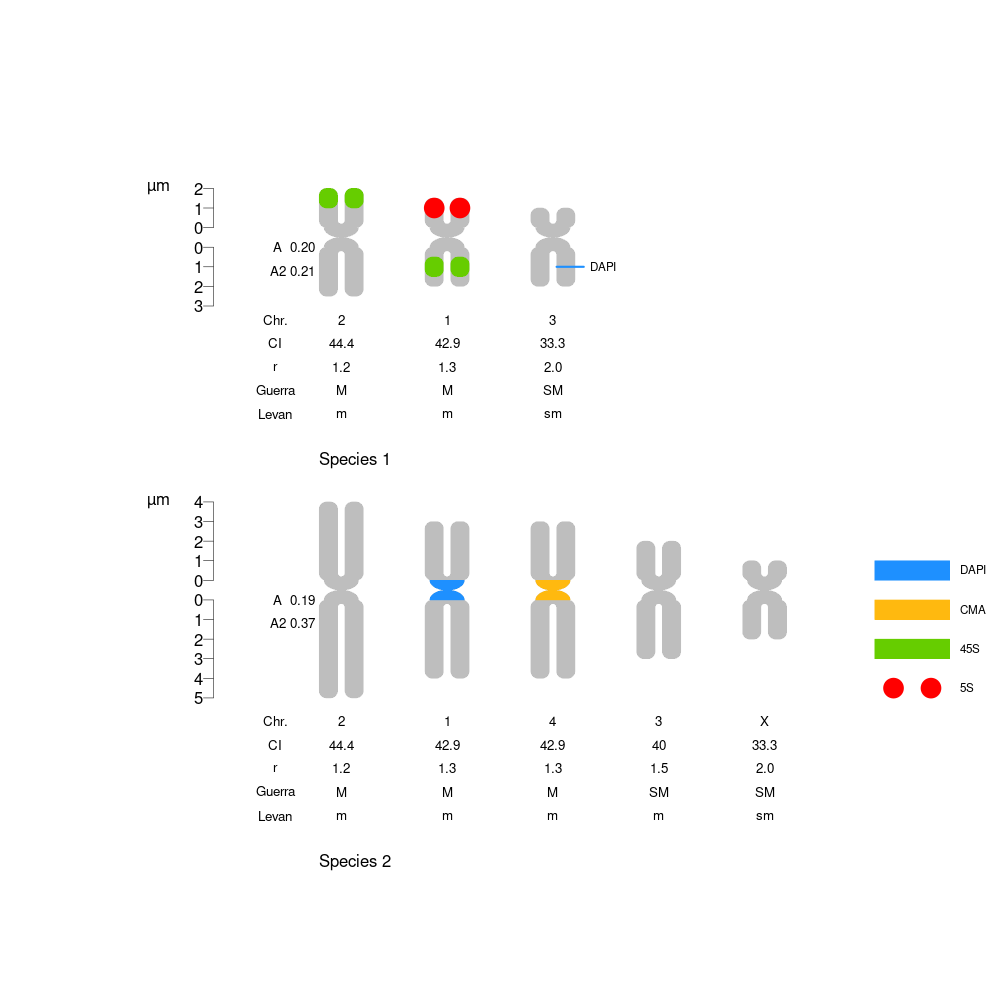

In [20]:
#png("mydfChrSize2.png", width=550, height=550)
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)
par(mar = c(0, 0, 0, 0))
suppressMessages(
plotIdiograms(dfChrSize   = bigdfOfChrSize[1:8,],  # chr. size data.frame
              dfMarkColor = mydfMarkColor,# mark style df
              dfMarkPos   = bigdfOfMarks, # mark position df
              
              centromereSize = 0,         # <- HERE
              
              squareness=3,               # vertices squareness  
              chrSpacing = .7,            # space among chr.
              karHeight = 2,              # karyotype rel. height 
              karHeiSpace=4,              # vertical size of karyotype including spacer
              amoSepar= 2.5,              # separation among karyotype
              
              indexIdTextSize=.8,         # font size of chr. name and indices
              karIndexPos = .1,           # position of kar. index
              markLabelSize=.7,           # font size of mark legends
              fixCenBorder = FALSE,       # do not use chrColor as border color of cen. or cen. marks
              distTextChr = .8,           # separation among chr. and ind.
              
              rulerPos= 0,                # ruler position
              ruler.tck=-0.01,            # ticks of ruler size and orientation
              xPosRulerTitle = 2.6,       # ruler units pos.
              
              xlimLeftMod = 2,            # modify xlim left argument 
              ylimBotMod = 0.4,           # modify ylim bottom argument
              ylimTopMod = 0              # modify ylim top argument
              ,lwd.cM = 2                 # thickness of cM marks 
              )
)
#dev.off()


There is no need to add `dfMarkColor` and you can also use the parameter
`mycolors` (optional too), to establish marks' colors. Colors are assigned depending on the order of marks, i.e.:

In [21]:
unique(mydfOfMarks$markName) 

[1] "45S"     "5S"      "B mark"  "cB mark" "cgene4"  "cgene1"  "cgene2" 
 [8] "DAPI"    "cgene3"  "CMA"

Let's use the `cM` style of marks. A protruding line.

`cM` style does not apply to centromere marks. To make something similar, use `centromereSize=0`, `legend="inline"` and `fixCenBorder = FALSE`. 

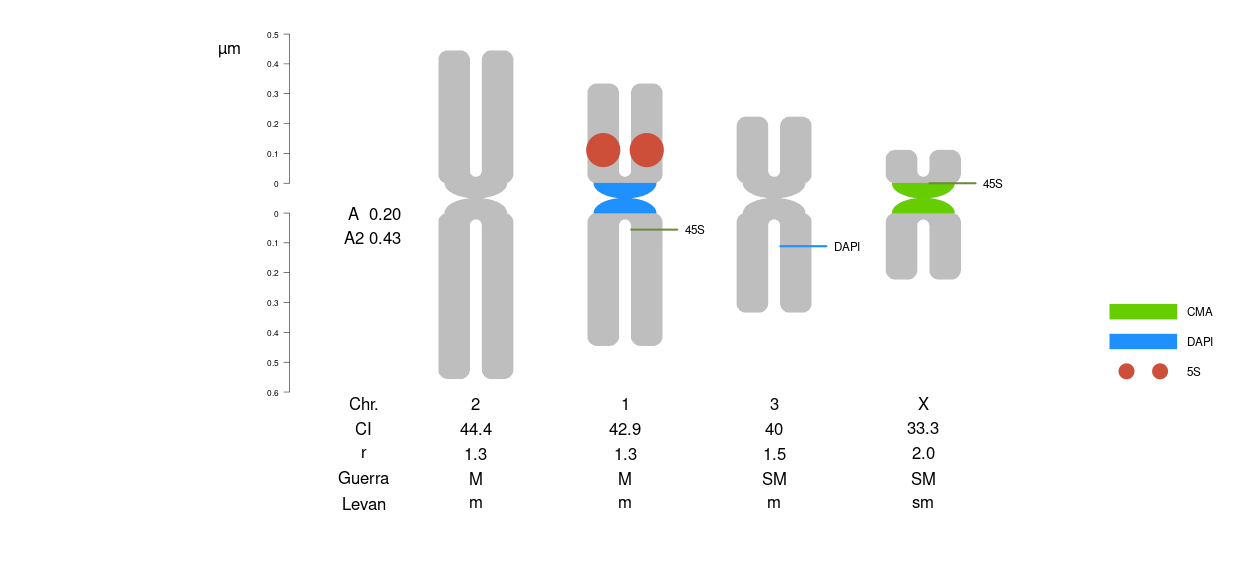

In [22]:
charVectorCol <- c("tomato3","darkolivegreen4","dfsd","dodgerblue","chartreuse3")

# Modify size of kar. to use rulerInterval and ceilingFactor (>= 1.13)  
quo<-9
dfOfChrSize2<-dfOfChrSize
dfOfChrSize2$shortArmSize<-dfOfChrSize$shortArmSize/quo
dfOfChrSize2$longArmSize<-dfOfChrSize$longArmSize/quo
dfOfMarks2b<-dfOfMarks2
dfOfMarks2b$markSize<-dfOfMarks2$markSize/quo
dfOfMarks2b$markDistCen<-dfOfMarks2$markDistCen/quo

#png("dfOfChrSizeVector.png", width=1000, height=450)
par(mar=rep(0,4))

options(repr.plot.width = 1000/80, repr.plot.height = 450/80, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize = dfOfChrSize2,    # d.f. of chr. sizes
              dfMarkPos = dfOfMarks2b,     # d.f. of marks' positions
              defaultStyleMark = "cM",     # forces "cM" style in d.f dfMarkColor (exc. 5S)
              
              mycolors = charVectorCol,    # colors to use
              
              distTextChr = 0.5,           # separ. text and chr.
              
              markLabelSize=.7,            # font size for labels (legend)
              lwd.cM=2,                    # width of cM marks
              legendWidth=0.9,             # legend item width
              legendHeight=.5,
              
              rulerPos= 0,                 # ruler position
              ruler.tck=-0.01,             # ruler tick orientation and length
              rulerNumberSize=.5           # ruler font size
              ,xPosRulerTitle = 2.8        # ruler units pos.
              
              ,xlimRightMod = 1            # modify xlim right arg.
)
)
#dev.off() # close png


## Plot holocentrics

Initially you have to put your chromosome data in data.frames. 

Main three data.frames: 

* One for chr. sizes (parameter `dfChrSize`)
* One for marks' positions  (parameter `dfMarkPos`)
* One (optional) for mark style (parameter `dfMarkColor`)

For simplicity, I call a holocen. any karyotype without centromeres. 

Accordingly, they lack the columns: `shortArmSize` and `longArmSize`.

### From scratch: 

In [23]:
# Example data.frame written in R, use: (column OTU is optional if only 1 OTU)
mydfChrSizeHolo<-read.table(text=
"            OTU chrName chrSize  
\"Species one\"   1     6.5      
\"Species one\"   2     5.0      
\"Species one\"   3     4.0
\"Species one\"   4     4.0
\"Species one\"   X     3.0    "  ,  header=TRUE, stringsAsFactors=FALSE,fill=TRUE)
mydfChrSizeHolo

OTU,chrName,chrSize
<chr>,<chr>,<dbl>
Species one,1,6.5
Species one,2,5.0
Species one,3,4.0
Species one,4,4.0
Species one,X,3.0


For fixing column names use:

In [24]:
colnames(mydfChrSize)<-c("OTU", "chrName","chrSize")

### Get marks general data 

Put your mark data in a data.frame. This data.frame has the marks present in all karyotypes without position info.
If the `style` column is not present, param. `defaultStyleMark = "square"` will be used during plotting.

In [25]:
# From scratch:
mydfMarkColorHolo<-read.table(text=
"  markName    markColor      style
     5S        red            dots
     45S       chartreuse3    square
     gene2     salmon         downArrow
     gene3     \"#056522\"    cMLeft
     gene4     darkmagenta    cM
     DAPI      dodgerblue     square
     protein   cornflowerblue exProtein
     B         black          square
     gene1     chocolate      upArrow
     CMA       darkgoldenrod1 square"  ,  header=TRUE, stringsAsFactors=FALSE,fill=TRUE)
mydfMarkColorHolo

markName,markColor,style
<chr>,<chr>,<chr>
5S,red,dots
45S,chartreuse3,square
gene2,salmon,downArrow
gene3,#056522,cMLeft
gene4,darkmagenta,cM
DAPI,dodgerblue,square
protein,cornflowerblue,exProtein
B,black,square
gene1,chocolate,upArrow


For fixing column names use:


In [26]:
colnames(mydfMarkColorHolo) <- c("markName", "markColor","style") 
# if style column not present it will be filled with "square"

### Get marks positions data

Open or write your mark positions in a data.frame. This data.frame has the marks present in all karyotypes with position info.

For holocentrics, position is defined with column `markPos`, while in monocentrics it is `markDistCen`.

Column `chrRegion` can be absent for holocentrics.

In [31]:
# We will use column OTU if data.frame because chromosome size df has it
mydfMarkPosHolo<-read.table(text=
"          OTU  chrName markName markPos markSize chrRegion
\"Species one\"       4        B      NA       NA        w    # w = whole chromosome mark 
\"Species one\"       3     DAPI     2.0      0.5
\"Species one\"       1      45S     2.0      0.5
\"Species one\"       2     protein  3.5      1.5
\"Species one\"       2     gene1    1.0      0.5
\"Species one\"       1     gene2    1.0      0.5
\"Species one\"       4     gene3    3.0      0.5
\"Species one\"       3     gene4    1.0      0.5
\"Species one\"       X      CMA     2.0      0.5
\"Species one\"       X       5S     0.5      0.5
\"Species one\"       X       5S     0.5      0.5"  ,  header=TRUE, stringsAsFactors=FALSE,fill=TRUE)
mydfMarkPosHolo

OTU,chrName,markName,markPos,markSize,chrRegion
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Species one,4,B,NA,NA,w
Species one,3,DAPI,2.0,0.5,
Species one,1,45S,2.0,0.5,
Species one,2,protein,3.5,1.5,
Species one,2,gene1,1.0,0.5,
Species one,1,gene2,1.0,0.5,
Species one,4,gene3,3.0,0.5,
Species one,3,gene4,1.0,0.5,
Species one,X,CMA,2.0,0.5,


For fixing column names use something like:

In [32]:
colnames(mydfMarkPosHolo)<-c("OTU", "chrName","markName","markPos","markSize","chrRegion") 

### Plotting 

You can plot without marks (passing only 1st data.frame), but we will use all 4 data.frames created:


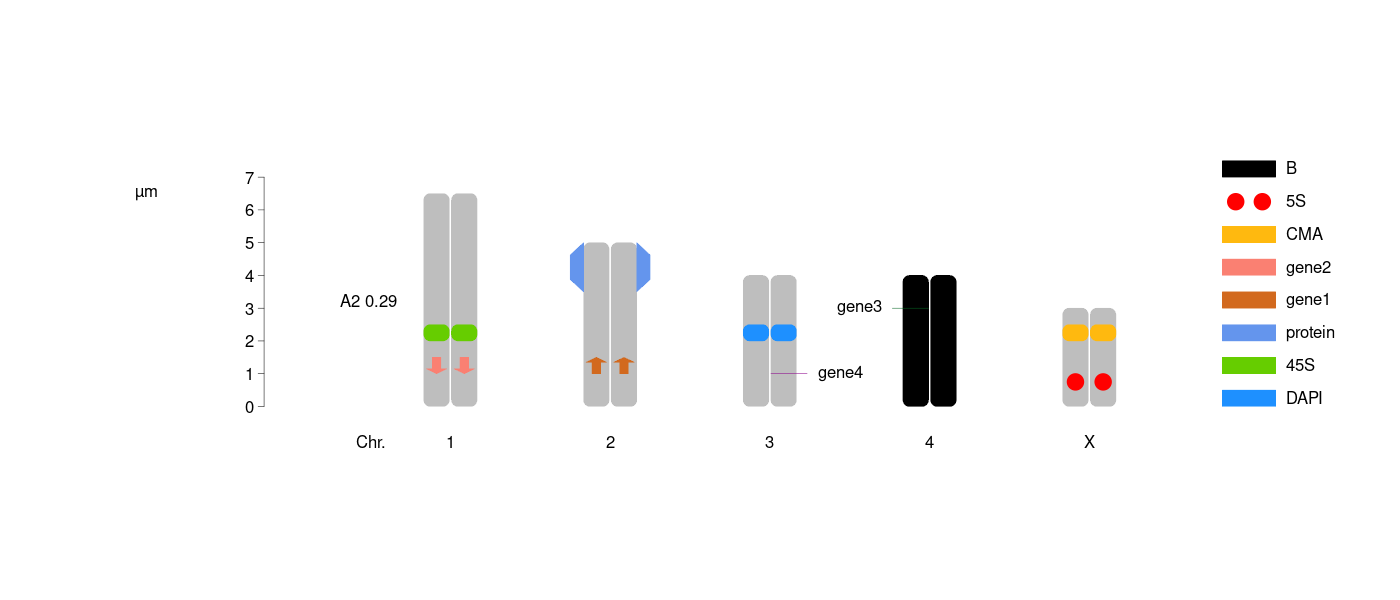

In [33]:
par(mar=c(0,0,0,1)) # bottom left top right

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 100)
suppressMessages(
plotIdiograms(dfChrSize  = mydfChrSizeHolo,    # data.frame of chr. sizes
              dfMarkColor= mydfMarkColorHolo,  # df of mark style
              dfMarkPos  = mydfMarkPosHolo,    # df of mark positions
              chrSpacing = 1,
              addOTUName=FALSE,            # add OTU names
              
              xlimLeftMod= 2,              # modify xlim left argument
              ylimTopMod= -1,              # modify ylim top argument
              ylimBotMod= -2               # modify ylim bottom argument
              ,rulerPos = 0                # ruler position
              ,ruler.tck = -0.01           # ruler ticks size and orient.
              ,xPosRulerTitle=2.6
              
              ,legendWidth=1               # width of legend
              ,legendHeight=.5             # height of legend item 
              ,xModifier = 50              # separation among chromatids
)
)


It is not mandatory to use `dfMarkColor` and you can also use the parameter
`mycolors` (optional too), to establish marks' colors. When using `mycolors`, colors are assigned depending on the order of marks, i.e.:


[1] "5S"   "DAPI" "45S"  "CMA"

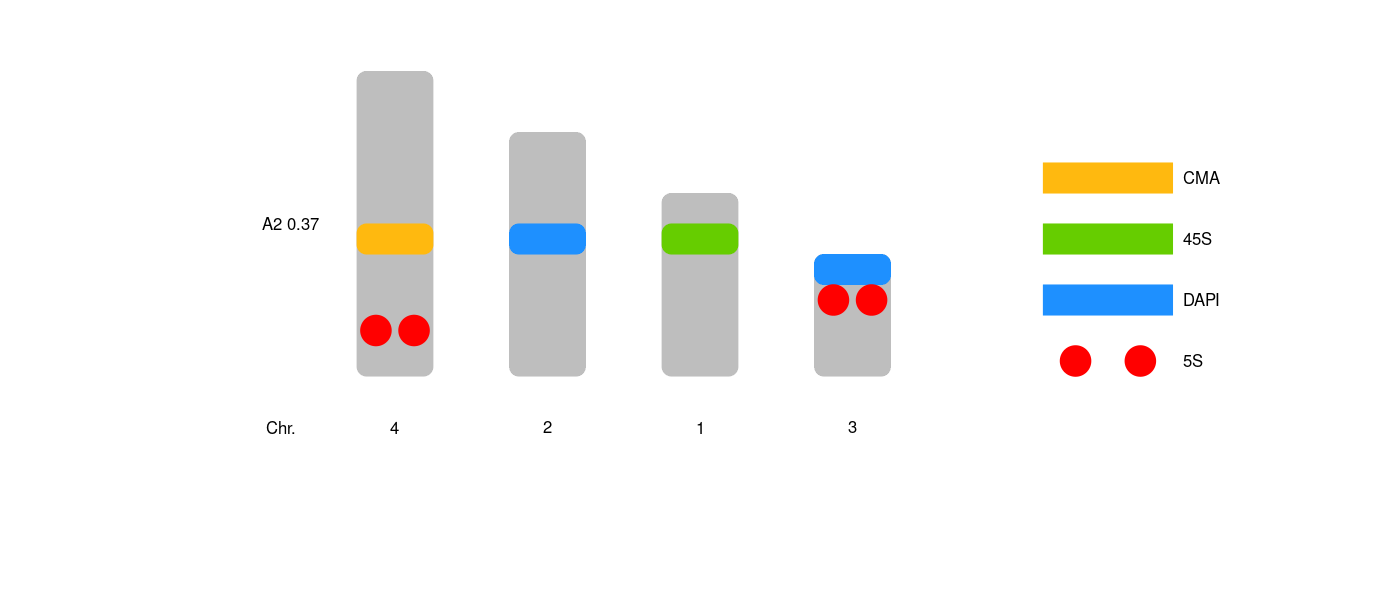

In [35]:
unique(dfMarkPosHolo$markName)

par(mar=rep(0,4)) 

options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 100)
suppressMessages(
plotIdiograms(dfChrSize = dfChrSizeHolo,  # d.f. of chr. size
              dfMarkPos = dfMarkPosHolo,  # d.f. of marks' positions
              
              mycolors   = c("red","dodgerblue","fdsjkfds","chartreuse3","darkgoldenrod1"),  # colors for marks

              addOTUName=FALSE,           # do not add OTU name
              ruler=FALSE,                # do not add ruler
              xlimLeftMod=1,              # modify left xlim arg.
              xlimRightMod=3,             # modify right xlim arg.
              ylimBotMod=.2               # modify bottom ylim
              ,chromatids=FALSE           # do not show separ. chromatids

)
)

## ggplot holocentrics

With function `mapGGChrMark` and the data.frames of chr. (`dfChrSizeHolo`) and marks' position (`dfMarkPosHolo`) for one OTU, you get a list of data.frames for ggplot [@R-ggplot2] 


Loading required package: ggplot2



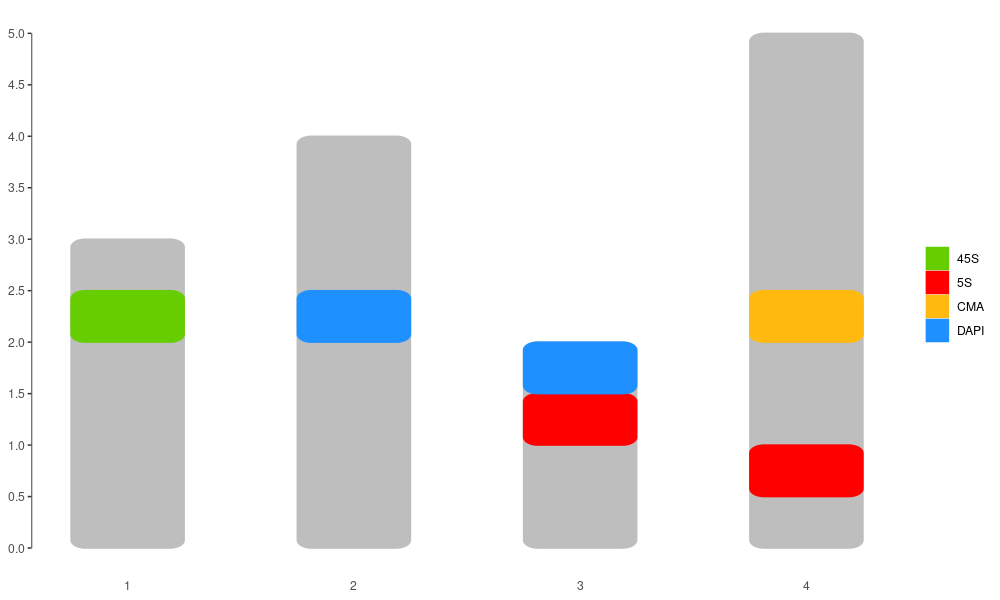

In [36]:
chrAndMarksMap <- mapGGChrMark(dfChrSizeHolo, dfMarkPosHolo, chrSpacing = .5)

require(ggplot2)

myColors <- c("chartreuse3","red","darkgoldenrod1","dodgerblue")
names(myColors) <- c("45S","5S","CMA","DAPI")

options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 100)

ggplot() + 
  geom_polygon(aes(x=x,
                   y=y,
                   group=Chr
                   ) 
                ,data=chrAndMarksMap$dataChr
                ,color="gray"
                ,fill="gray"
  ) +
  geom_polygon(aes(x=x,y=y,
                   group=id,
                   color=markName,
                   fill=markName
                   ) 
                ,data=chrAndMarksMap$dataMark
  ) +
  theme_classic() +
  scale_color_manual(
      values = myColors
    ) +
  scale_fill_manual(
      values = myColors
    ) +
  scale_x_continuous(breaks = seq(1, nrow(dfChrSizeHolo), 1 )
  ) +
  scale_y_continuous(breaks = seq(0, 5, 0.5)
  ) +
  geom_segment(aes(y=0, yend=5, x=-Inf, xend=-Inf)
  )+
  theme(axis.line   = element_blank(),
        axis.ticks.x= element_blank(),
        axis.title  = element_blank()
        ,title      = element_blank()
  )

#require(svglite)
#ggsave(file="ggplot.svg",width=6, height=4)


## Plot holo. and mono. in the same karyotype

To accomplish this, we will use `cenStyle` marks in a "holocen." karyotype. The ruler is continuous as in holocen.


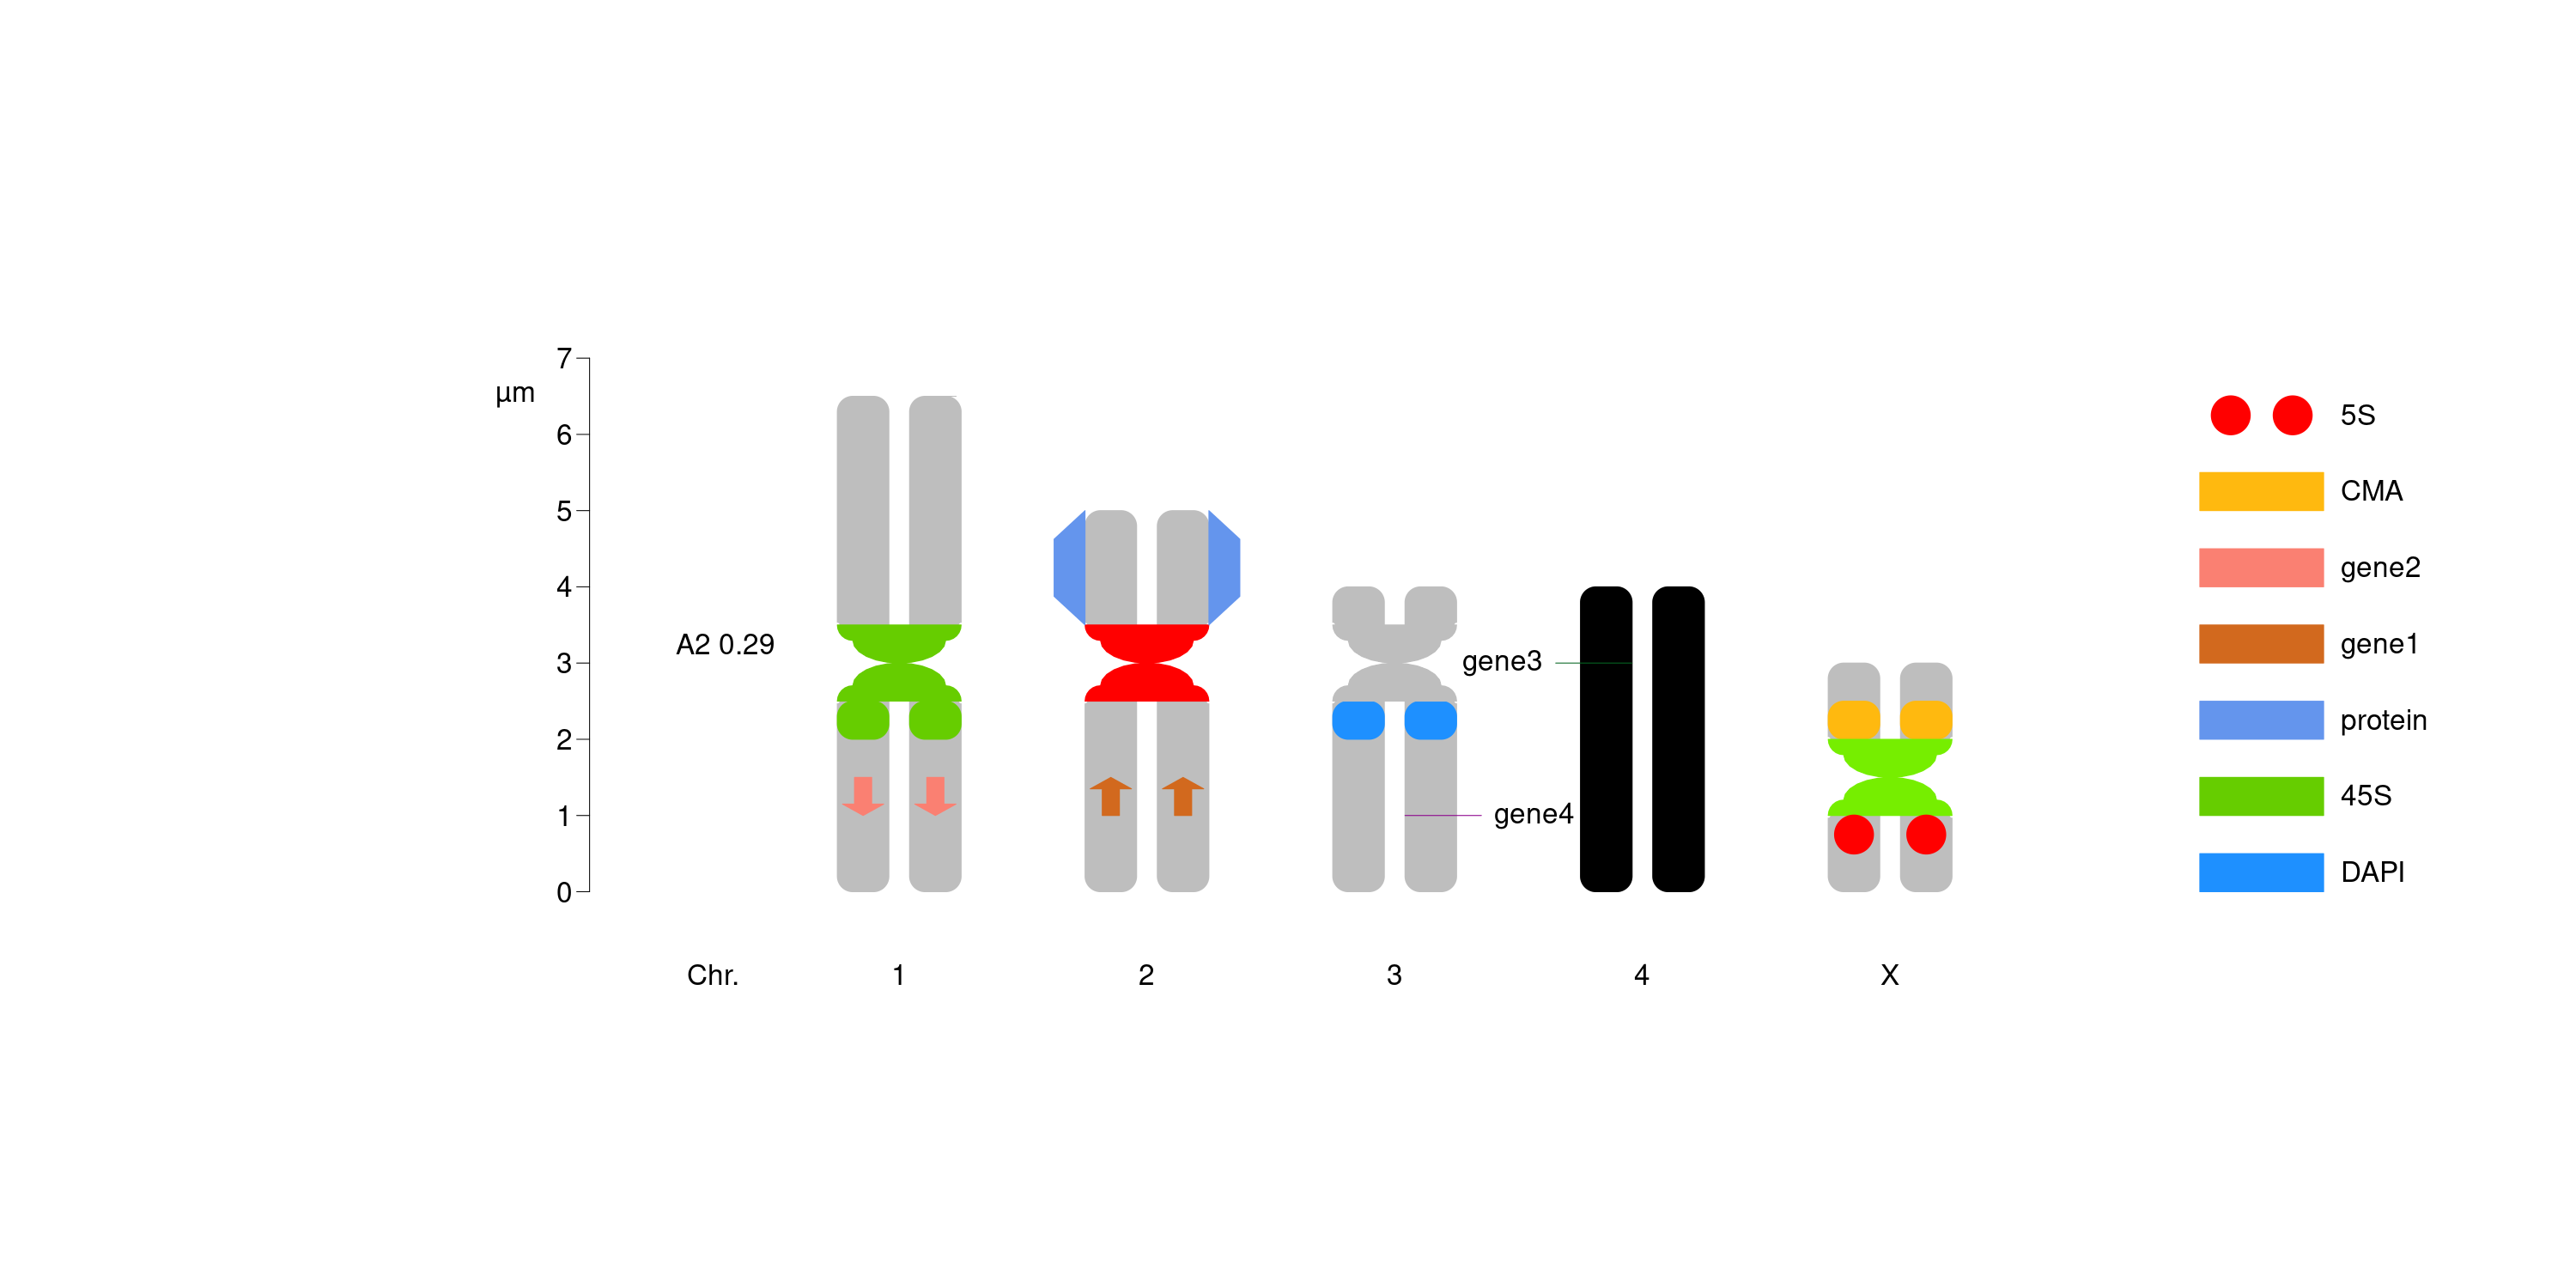

In [39]:
# mark general characteristics' data.frame:

mydfMarkColorHolo2 <- read.table(text=
"  markName    markColor      style
     5S        red            dots
     45S       chartreuse3    square
     gene2     salmon         downArrow
     gene3     \"#056522\"    cMLeft
     gene4     darkmagenta    cM
     DAPI      dodgerblue     square
     protein   cornflowerblue exProtein
     B         black          square
     gene1     chocolate      upArrow
     CMA       darkgoldenrod1 square
     c45S      chartreuse3    cenStyle    # <- simulate Cen.
     myCen2    red            cenStyle
     myCen     chartreuse2    cenStyle
     constr    NA             cenStyle"  ,  header=TRUE, stringsAsFactors=FALSE,fill=TRUE)


# add new cenStyle marks to data.frame of marks' position, created above

mydfMarkPosHolo2<-plyr::rbind.fill(mydfMarkPosHolo,
                                   data.frame(OTU="Species one",
                                              chrName=c(1:3,"X"),
                                              markName=c("c45S","myCen2","constr","myCen"), # <- use new mark
                                              markPos= c(rep(2.5,3),1),
                                              markSize=NA 
                                              )
                  )

# png("mydChrSizeHolo.png", width=600, height=300)
par(mar=c(0,0,0,1)) # bottom left top right

options(repr.plot.width = 1200/80, repr.plot.height = 600/80, repr.plot.res = 200)
suppressMessages(
plotIdiograms(dfChrSize  = mydfChrSizeHolo,     # data.frame of chr. sizes
              dfMarkColor= mydfMarkColorHolo2,  # df of mark style
              dfMarkPos  = mydfMarkPosHolo2,    # df of mark positions
              addOTUName=FALSE,             # add OTU names
              
              xlimLeftMod= 2,              # modify xlim left argument
              ylimTopMod= -1,              # modify ylim top argument
              ylimBotMod= -2               # modify ylim bottom argument
              ,rulerPos = 0
              ,ruler.tck = -0.01
              ,xPosRulerTitle = 2.6
              
              ,legendWidth=1               # width of legend
              ,legendHeight=.5             # height of legend item 
              ,lwd.mimicCen=2.5            # line width of const. mark
              ,pattern="^c"                # regex pattern to remove from mark names
              ,remSimiMarkLeg = TRUE       # remove pseudoduplicated mark names (got equal after pattern removal)
              ,bannedMarkName = c("myCen","myCen2","B") # hide label
              # ,legend="inline"           # legends inline
)
)